# Quantum Integer Programming and Quantum Machine Learning 47-779/785, Tepper School of Business.
# Introduction to Quantum Computing 18-819F, Electrical and Computers Engineering.
# Fall 2021, Carnegie Mellon University

This notebook contains material from the Quantum Integer Programming and Quantum Machine Learning Course at CMU Fall 2021 by David Bernal (bernalde at cmu.edu), Sridhar Tayur (stayur at cmu.edu), Elias Towe (towe at cmu.edu), and Davide Venturelli; the content is available on **[Github](https://github.com/bernalde/QuIPML)**.
The text is released under the **[CC-BY-NC-ND-4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode) license, and code is released under the **[MIT license](https://opensource.org/licenses/MIT).*

Run in **[Google Colab](https://colab.research.google.com/github/bernalde/QuIPML/blob/master/notebooks/Notebook%204%20-%20Benchmarking.ipynb)**

## Benchmarking
With the new availability of unconventional hardware, novel algorithms, and increasingly optimized software to address optimization problems; the first question that arises is, which one is better?
We will call the combination of hardware, algorithm, and software within a solution method as a solver.
This question is also relevant when evaluating a single solver, given that usually they rely on hyperparameters, for which the quesiton now becomes into, which is the best parameter setting for a given solver?
These questions obviously depend on the problem that one is trying to solve. The solution of the problem also depends on the budget of resources that one has available.

In the case that the available resources are relatively "unlimited" and that the problem to solve is known, one could exhaustively try all the parameter settings within a delimited range for that instance and choose which one is the best.
This case is idealistic, in the sense that usually one does not know a-priori which problem is there to solve (and if while testing all the parameters you solve it, what would be the point of identifying the best parameters?), and that there exists limitations in terms of resources, e.g., time, memory, or energy, when trying to address these problems.
A case closer to reality is where you have the chance of solving problems that look similar to the one that you are interested in solving later, either because you have previously generated problems or you have identified a feature that characterizes your problem of interest and can generate random instances, which we will call as a family of instances.
Then, you can use a larger amount of resources to solve that family of problems "off-line", meaning that you spend extra resources to address the problems in your family of instances although it is unrelated to the actual application.
Finally, you would like to use the results that you found off-line as a guidance to solve your unknown problem more efficiently.

## Example
For illustration purposes, we will use an example that you are already familiar with, which is an Ising model. As a solver, we will use a simulated annealing code provided by D-Wave Ocean Tools.

## Ising model
This notebook will explain the basics of the Ising model. In order to implement the different Ising Models we will use D-Wave's packages **[dimod](https://github.com/dwavesystems/dimod)** and **[neal](https://github.com/dwavesystems/dwave-neal)**, for defining the Ising model and solving it with simulated annealing, respectively.

#### Problem statement
We pose the Ising problem as the following optimization problem:
$$
\min_{\sigma \in \{ -1,+1 \}^n} H(\sigma) =\min_{\sigma \in \{ -1,+1 \}^n} \sum_{(ij) \in E(G)} J_{ij}\sigma_i\sigma_j + \sum_{i \in V(G)}h_i\sigma_i + c_I
$$
where we optimize over spins $\sigma \in \{ -1,+1 \}^n$, on a constrained graph $G(V,E)$, where the quadratic coefficients are $J_{ij}$ and the linear coefficients are $h_i$. We also include an arbitrary offset of the Ising model $c_I$.

### Example 1
Suppose we have an Ising model defined from
$$
J_{0, 3}=24.0,J_{0, 4}=24.0,J_{0, 5}=24.0,J_{0, 7}=24.0,J_{0, 8}=24.0,J_{0, 9}=24.0,J_{0, 10}=24.0,\\
J_{1, 3}=24.0,J_{1, 5}=24.0,J_{1, 6}=24.0,J_{1, 8}=24.0,J_{1, 9}=24.0,J_{1, 10}=24.0,\\
J_{2, 4}=24.0,J_{2, 6}=24.0,J_{2, 7}=24.0,J_{2, 8}=24.0,J_{2, 9}=24.0,J_{2, 10}=24.0,\\
J_{3, 4}=24.0,J_{3, 5}=48.0,J_{3, 6}=24.0,J_{3, 7}=24.0,J_{3, 8}=48.0,J_{3, 9}=48.0,J_{3, 10}=48.0,\\
J_{4, 5}=24.0,J_{4, 6}=24.0,J_{4, 7}=48.0,J_{4, 8}=48.0,J_{4, 9}=48.0,J_{4, 10}=48.0,\\
J_{5, 6}=24.0,J_{5, 7}=24.0,J_{5, 8}=48.0,J_{5, 9}=48.0,J_{5, 10}=48.0,\\
J_{6, 7}=24.0,J_{6, 8}=48.0,J_{6, 9}=48.0,J_{6, 10}=48.0,\\
J_{7, 8}=48.0,J_{7, 9}=48.0,J_{7, 10}=48.0,\\
J_{8, 9}=72.0,J_{8, 10}=72.0,\\
J_{9, 10}=72.0 \\
J = \begin{bmatrix}
0 & 0 & 0 & 24 & 24 & 24 & 24 & 24 & 24 & 24 & 24\\
0 & 0 & 0 & 24 & 0 & 24 & 24 & 24 & 24 & 24 & 24\\
0 & 0 & 0 & 0 & 24 & 0 & 24 & 24 & 24 & 24 & 24\\
0 & 0 & 0 & 0 & 24 & 48 & 24 & 24 & 48 & 48 & 48\\
0 & 0 & 0 & 0 & 0 & 24 & 24 & 48 & 48 & 48 & 48\\
0 & 0 & 0 & 0 & 0 & 0 & 24 & 24 & 48 & 48 & 48\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 24 & 48 & 48 & 48\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 48 & 48 & 48\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 72 & 72\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 72\\
\end{bmatrix} \\
h^\top = [145.0,122.0,122.0,266.0,266.0,266.0,242.5,266.0,386.5,387.0,386.5] \\
c_I = 1319.5
$$
Let's solve this problem

In [1]:
# If using this on Google collab, we need to install the packages
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Let's start with Pyomo, dimod and neal
if IN_COLAB:
    !pip install -q pyomo
    !pip install dimod
    !pip install dwave-neal

In [2]:
# Import the Dwave packages dimod and neal
import dimod
import neal
# Import Matplotlib to generate plots
import matplotlib.pyplot as plt
# Import numpy and scipy for certain numerical calculations below
import numpy as np
import math
from collections import Counter
import pandas as pd
from itertools import chain
import time
import networkx as nx
import os
import pickle
from scipy import stats
from matplotlib import ticker

In [3]:
# These could also be simple lists and numpy matrices
h = {0: 145.0, 1: 122.0, 2: 122.0, 3: 266.0, 4: 266.0, 5: 266.0, 6: 242.5, 7: 266.0, 8: 386.5, 9: 387.0, 10: 386.5}
J = {(0, 3): 24.0, (0, 4): 24.0, (0, 5): 24.0, (0, 7): 24.0, (0, 8): 24.0, (0, 9): 24.0, (0, 10): 24.0, (1, 3): 24.0, (1, 5): 24.0, (1, 6): 24.0, (1, 8): 24.0, (1, 9): 24.0, (1, 10): 24.0, (2, 4): 24.0, (2, 6): 24.0, (2, 7): 24.0, (2, 8): 24.0, (2, 9): 24.0, (2, 10): 24.0, (3, 4): 24.0, (3, 5): 48.0, (3, 6): 24.0, (3, 7): 24.0, (3, 8): 48.0, (3, 9): 48.0, (3, 10): 48.0, (4, 5): 24.0, (4, 6): 24.0, (4, 7): 48.0, (4, 8): 48.0, (4, 9): 48.0, (4, 10): 48.0, (5, 6): 24.0, (5, 7): 24.0, (5, 8): 48.0, (5, 9): 48.0, (5, 10): 48.0, (6, 7): 24.0, (6, 8): 48.0, (6, 9): 48.0, (6, 10): 48.0, (7, 8): 48.0, (7, 9): 48.0, (7, 10): 48.0, (8, 9): 72.0, (8, 10): 72.0, (9, 10): 72.0}
cI = 1319.5

model_ising = dimod.BinaryQuadraticModel.from_ising(h, J, offset=cI)



/tmp/ipykernel_19294/1437022254.py:1: DeprecationWarning: BinaryQuadraticModel.to_networkx_graph() is deprecated since dimod 0.10.0, use bqm.to_networkx_graph() instead.
  nx_graph = model_ising.to_networkx_graph()


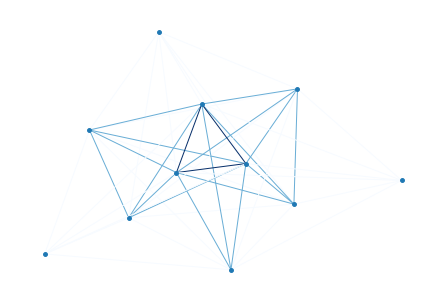

In [4]:
nx_graph = model_ising.to_networkx_graph()
edges, bias = zip(*nx.get_edge_attributes(nx_graph, 'bias').items())
bias = np.array(bias)
nx.draw(nx_graph, node_size=15, pos=nx.spring_layout(nx_graph),
        edgelist=edges, edge_color=bias, edge_cmap=plt.cm.Blues)


Since the problem is relatively small (11 variables, $2^{11}=2048$ combinations), we can afford to enumerate all the solutions.

In [5]:
exactSampler = dimod.reference.samplers.ExactSolver()
start = time.time()
exactSamples = exactSampler.sample(model_ising)
timeEnum = time.time() - start

In [6]:
# Some useful functions to get plots
def plot_enumerate(results, title=None):

    _, ax = plt.subplots()

    energies = [datum.energy for datum in results.data(
        ['energy'], sorted_by='energy')]

    if results.vartype == 'Vartype.BINARY':
        samples = [''.join(c for c in str(datum.sample.values()).strip(
            ', ') if c.isdigit()) for datum in results.data(['sample'], sorted_by=None)]
        ax.set(xlabel='bitstring for solution')
    else:
        samples = np.arange(len(energies))
        ax.set(xlabel='solution')

    ax.bar(samples, energies)
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylabel('Energy')
    if title:
        ax.set_title(str(title))
    print("minimum energy:", min(energies))
    return ax


def plot_samples(results, title=None, skip=1):
    _, ax = plt.subplots()
    if results.vartype == 'Vartype.BINARY':
        samples = [''.join(c for c in str(datum.sample.values()).strip(
            ', ') if c.isdigit()) for datum in results.data(['sample'], sorted_by=None)]
        ax.set_xlabel('bitstring for solution')
    else:
        samples = np.arange(len(energies))
        ax.set_xlabel('solution')

    counts = Counter(samples)
    total = len(samples)
    for key in counts:
        counts[key] /= total
    df = pd.DataFrame.from_dict(counts, orient='index').sort_index()
    df.plot(kind='bar', legend=None, ax=ax)

    ax.tick_params(axis='x', rotation=80)
    ax.set_xticklabels([t.get_text()[:7] if not i%skip else "" for i,t in enumerate(ax.get_xticklabels())])
    ax.set_ylabel('Probabilities')
    if title:
        ax.set_title(str(title))
    print("minimum energy:", min(energies))
    return ax


def plot_energies(results, title=None, skip=1):
    _, ax = plt.subplots()
    # skip parameter given to avoid putting all xlabels
    energies = results.data_vectors['energy']
    occurrences = results.data_vectors['num_occurrences']
    counts = Counter(energies)
    total = sum(occurrences)
    counts = {}
    for index, energy in enumerate(energies):
        if energy in counts.keys():
            counts[energy] += occurrences[index]
        else:
            counts[energy] = occurrences[index]
    for key in counts:
        counts[key] /= total
    df = pd.DataFrame.from_dict(counts, orient='index').sort_index()
    df.plot(kind='bar', legend=None, ax = ax)
    ax.set_xticklabels([t.get_text()[:7] if not i%skip else "" for i,t in enumerate(ax.get_xticklabels())])

    ax.set_xlabel('Energy')
    ax.set_ylabel('Probabilities')
    if title:
        ax.set_title(str(title))
    print("minimum energy:", min(energies))
    return ax

minimum energy: 5.0
minimum energy: 5.0


<AxesSubplot:title={'center':'Enumerate all solutions'}, xlabel='Energy', ylabel='Probabilities'>

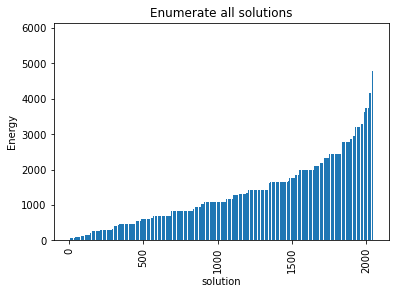

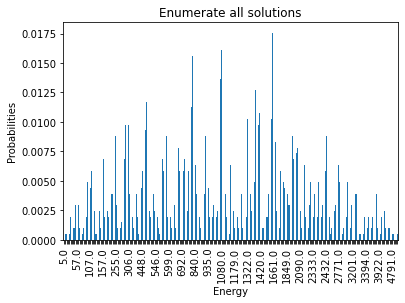

In [7]:
plot_enumerate(exactSamples, title='Enumerate all solutions')
plot_energies(exactSamples, title='Enumerate all solutions', skip=10)

We observe that the optimal solution of this problem is $x_{10} = 1, 0$ otherwise, leading to an objective of $5$. Notice that this problem has a degenerate optimal solution given that $x_8 = 1, 0$ otherwise also leads to the same solution.

## Let's go back to the slides

Let's now solve this problem using Simulated Annealing

In [8]:
simAnnSampler = neal.SimulatedAnnealingSampler()
simAnnSamples = simAnnSampler.sample(model_ising, num_reads=1000)


minimum energy: 5.0
minimum energy: 5.0


<AxesSubplot:title={'center':'Simulated annealing in default parameters'}, xlabel='Energy', ylabel='Probabilities'>

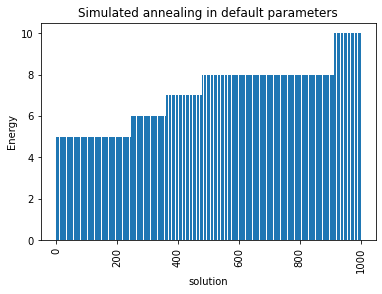

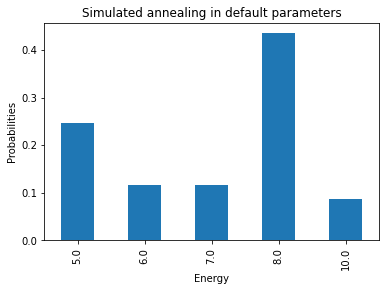

In [9]:
plot_enumerate(simAnnSamples, title='Simulated annealing in default parameters')
plot_energies(simAnnSamples, title='Simulated annealing in default parameters')

We are going to use the default limits of temperature given by the simulating annealing code. These are defined using the minimum and maximum nonzero coefficients in the Ising model. Then the range for beta is defined as $\beta \in \left[ \frac{\log(2)}{\max \{ \Delta E \} },\frac{\log(100)}{\min \{ \Delta E \} } \right]$, where $\Delta E = \min \{h_i \} + \sum_j J_{ij}+J_{ji}$.

Hot temperature: We want to scale hot_beta so that for the most unlikely qubit flip, we get at least 50% chance of flipping. (This means all other qubits will have > 50% chance of flipping initially). Most unlikely flip is when we go from a very low energy state to a high energy state, thus we calculate hot_beta based on max_delta_energy.
$$
0.50 = \exp(-\overline{\beta} * \max \{ \Delta E \})
$$

Cold temperature: Towards the end of the annealing schedule, we want to minimize the chance of flipping. Don't want to be stuck between small energy tweaks. Hence, set cold_beta so that at minimum energy change, the chance of flipping is set to 1%.
$$
0.01 = \exp(-\underline{\beta} * \min \{ \Delta E \})
$$

By default, the schedule also follows a geometric series.

{'beta_range': [0.0008222386483510621, 0.19188209108283716], 'beta_schedule_type': 'geometric'}


Text(0.5, 1.0, 'Default Geometric temperature schedule')

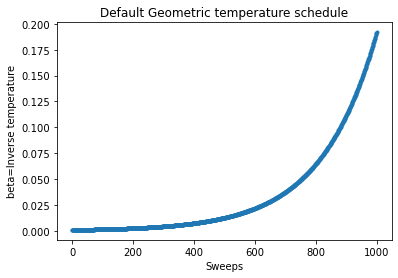

In [10]:
print(simAnnSamples.info)
beta_schedule = np.geomspace(*simAnnSamples.info['beta_range'], num=1000)
fig, ax = plt.subplots()
ax.plot(beta_schedule,'.')
ax.set_xlabel('Sweeps')
ax.set_ylabel('beta=Inverse temperature')
ax.set_title('Default Geometric temperature schedule')

## Let's go back to the slides

Now let's compute an expected time metric with respect to the number of sweeps in simulated annealing.

In [11]:
s = 0.99
# sweeps = list(chain(np.arange(1,10,1),np.arange(10,30,2), np.arange(30,50,5), np.arange(50,100,10) ,np.arange(100,1001,100)))
sweeps = list(chain(np.arange(1, 250, 1), np.arange(250, 1001, 10)))
schedules = ['geometric','linear']
opt_energy = 5
results = {}
results['p'] = {}
results['tts'] = {}
results['t']= {}
for schedule in schedules:
    probs = []
    time_to_sol = []
    times = []
    for sweep in sweeps:
        start = time.time()
        samples = simAnnSampler.sample(model_ising, num_reads=1000, num_sweeps=sweep, beta_schedule_type=schedule)
        time_s = time.time() - start
        energies=samples.data_vectors['energy']
        occurrences = samples.data_vectors['num_occurrences']
        total_counts = sum(occurrences)
        counts = {}
        for index, energy in enumerate(energies):
            if energy in counts.keys():
                counts[energy] += occurrences[index]
            else:
                counts[energy] = occurrences[index]
        pr = sum(counts[key]
                 for key in counts.keys() if key <= opt_energy)/total_counts
        probs.append(pr)
        if pr == 0:
            time_to_sol.append(np.inf)
        else:
            time_to_sol.append(time_s*math.log10(1-s)/math.log10(1-pr))
        times.append(time_s)
    results['p'][schedule] = probs
    results['tts'][schedule] = time_to_sol
    results['t'][schedule] = times


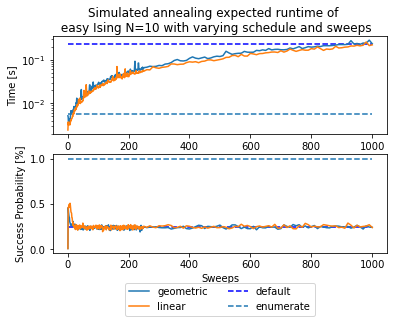

In [12]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Simulated annealing expected runtime of \n' +
             ' easy Ising N=10 with varying schedule and sweeps')

for schedule in schedules:
    ax1.semilogy(sweeps, results['t'][schedule], '-', label=schedule)
ax1.hlines(results['t']['geometric'][-1], sweeps[0], sweeps[-1],
           linestyle='--', label='default', colors='b')
ax1.hlines(timeEnum, sweeps[0], sweeps[-1], linestyle='--', label='enumerate')

ax1.set(ylabel='Time [s]')

for schedule in schedules:
    ax2.plot(sweeps, results['p'][schedule], '-', label=schedule)
ax2.hlines(results['p']['geometric'][-1], sweeps[0], sweeps[-1],
           linestyle='--', label='default', colors='b')
ax2.hlines(1, sweeps[0], sweeps[-1], linestyle='--', label='enumerate')

ax2.set(ylabel='Success Probability [%]')
ax2.set(xlabel='Sweeps')

plt.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.25))


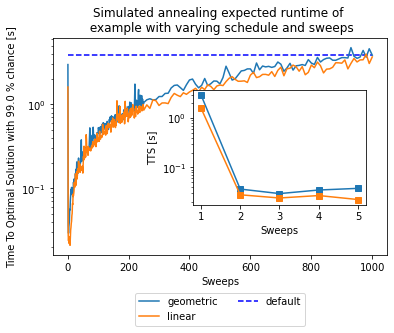

In [13]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
for schedule in schedules:
    ax1.semilogy(sweeps, results['tts'][schedule], '-', label=schedule)


# Value for the default solution
ttsDefault = results['tts']['geometric'][-1]
ax1.hlines(ttsDefault, sweeps[0], sweeps[-1], linestyle='--', label='default', colors='b')


ax1.set_ylabel('Time To Optimal Solution with ' + str(s*100) +' % chance [s]')
ax1.set_xlabel('Sweeps')
ax1.set_title('Simulated annealing expected runtime of \n' + ' example with varying schedule and sweeps')

ax2 = plt.axes([.45, .3, .4, .4])
for schedule in schedules:
    ax2.semilogy(sweeps[0:5],results['tts'][schedule][0:5],'-s')
ax2.set_ylabel('TTS [s]')
ax2.set_xlabel('Sweeps')


ax1.legend(ncol = 2, loc='upper center', bbox_to_anchor=(0.5, -0.15))


As you can notice, the default parameters given by D-Wave (number of sweeps = 1000 and a geometric update of $\beta$) are not optimal for our tiny example in terms of expected runtime.
This is certainly a function of the problem, for such a small instance having two sweeps are more than enough and more sweeps are an overkill.
This parameters choice might not generalize to any other problem, as seen below.

## Example 2
Let's define a larger model, with 100 variables and random weights, to see how this performance changes.

Assume that we are interested at the instance created with random weights coming from a seed of 42.

In [14]:
N = 100 # Number of variables
np.random.seed(42) # Fixing the random seed to get the same result
J = np.random.rand(N,N)
J = np.triu(J, 1) # We only consider upper triangular matrix ignoring the diagonal
h = np.random.rand(N)


In [15]:
model_random = dimod.BinaryQuadraticModel.from_ising(h, J, offset=0.0)

/tmp/ipykernel_19294/1579279843.py:1: DeprecationWarning: BinaryQuadraticModel.to_networkx_graph() is deprecated since dimod 0.10.0, use bqm.to_networkx_graph() instead.
  nx_graph = model_random.to_networkx_graph()


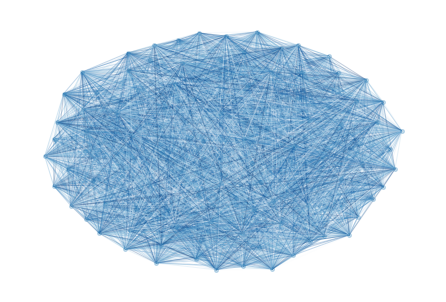

In [16]:
nx_graph = model_random.to_networkx_graph()
edges, bias = zip(*nx.get_edge_attributes(nx_graph, 'bias').items())
bias = np.array(bias)
nx.draw(nx_graph, node_size=15, pos=nx.spring_layout(nx_graph), alpha=0.25, edgelist=edges, edge_color=bias, edge_cmap=plt.cm.Blues)


In [17]:
start = time.time()
simAnnSamplesDefault = simAnnSampler.sample(model_random, num_reads=1000)
timeDefault = time.time() - start
energies = [datum.energy for datum in simAnnSamplesDefault.data(
        ['energy'], sorted_by='energy')]
min_energy = energies[0]
print(min_energy)


-236.4258051878277


minimum energy: -236.4258051878277
minimum energy: -236.4258051878277


<AxesSubplot:title={'center':'Simulated annealing with default parameters'}, xlabel='Energy', ylabel='Probabilities'>

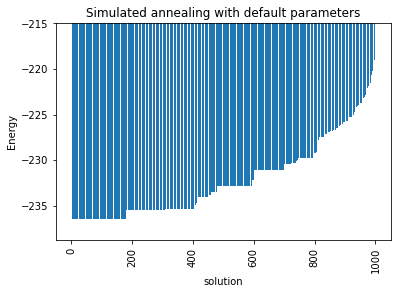

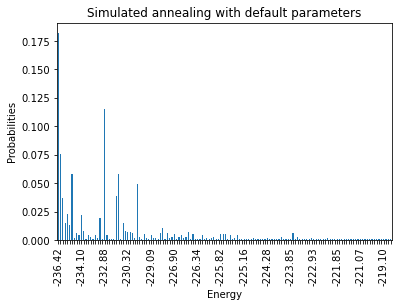

In [18]:
ax_enum = plot_enumerate(simAnnSamplesDefault,
               title='Simulated annealing with default parameters')
ax_enum.set(ylim=[min_energy*(0.99)**np.sign(min_energy),min_energy*(1.1)**np.sign(min_energy)])
plot_energies(simAnnSamplesDefault,
              title='Simulated annealing with default parameters', skip=10)


{'beta_range': [0.012287410263761801, 149913.5181892022], 'beta_schedule_type': 'geometric'}


Text(0.5, 1.0, 'Default Geometric temperature schedule')

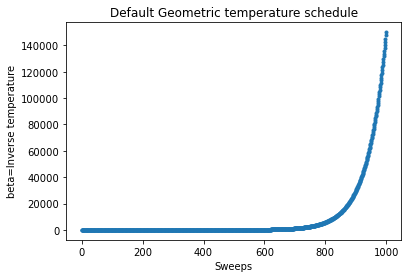

In [19]:
print(simAnnSamplesDefault.info)
beta_schedule = np.geomspace(*simAnnSamplesDefault.info['beta_range'], num=1000)
fig, ax = plt.subplots()
ax.plot(beta_schedule,'.')
ax.set_xlabel('Sweeps')
ax.set_ylabel('beta=Inverse temperature')
ax.set_title('Default Geometric temperature schedule')


We can solve this problem using IP such that we have guarantees that it is solved to optimality (this might be a great quiz for future lectures), but in this case let us define the "success" as getting an objective certain percentage of the best found solution inall cases (which we see it might not be even found with the default parameters).

Before figuring out if we have the right optimal parameters, we want to save some effort by loading previously computed results.
If you do not want to load the results that we are providing, feel free to change the `overwrite_pickles` variable, at the expense that it will take some time (around 3 minutes per instance) to run.
If you do not want to wait, drop the `results.zip` file in the folder that is about to be created.

In [32]:
current_path = os.getcwd()
pickle_path = os.path.join(current_path, 'results/')
if not(os.path.exists(pickle_path)):
    print('Results directory ' + pickle_path +
          ' does not exist. We will create it.')
    os.makedirs(pickle_path)

Put the file in there and we will decompress it for you.

In [46]:
import zipfile
zip_name = os.path.join(pickle_path, 'results.zip')
overwrite_pickles = False
use_raw_data = False
if os.path.exists(zip_name) and use_raw_data:
    with zipfile.ZipFile(zip_name, 'r') as zip_ref:
        zip_ref.extractall(pickle_path)
    print('Results zip file has been extrated to ' + pickle_path)

Now either we have the pickled file or not, let us compute the statistics we are looking for.

In [47]:
s = 0.99 # This is the success probability for the TTS calculation
treshold = 5.0 # This is a percentual treshold of what the minimum energy should be
# sweeps = list(chain(np.arange(1, 10, 1), np.arange(10, 30, 2), np.arange(
#     30, 50, 5), np.arange(50, 100, 10), np.arange(100, 1001, 100)))
sweeps = list(chain(np.arange(1, 250, 1), np.arange(250, 1001, 10)))
# sweeps = list(chain(np.arange(1, 200, 1))) + [1000]
# TODO: Run all the instances all the way to 1000
# sweeps = [1000]
# schedules = ['geometric', 'linear']
schedules = ['geometric']
total_reads = 1000
boots = [1, 10, total_reads]
min_energy = -239.5
instance = 42    
results_name = "results_" + str(instance) + ".pkl"
results_name = os.path.join(pickle_path, results_name)
results = {}
results['p'] = {}
results['tts'] = {}
results['ttsci'] = {}
results['t']= {}
results['best'] = {}
results['bestci'] = {}
# If you wanto to use the raw data and process it here
if use_raw_data:
    # If you want to generate the data or load it here
    overwrite_pickles = False

    for boot in boots:
        results['p'][boot] = {}
        results['tts'][boot] = {}
        results['ttsci'][boot] = {}
        results['best'][boot] = {}
        results['bestci'][boot] = {}

    for schedule in schedules:
        probs = {k: [] for k in boots}
        time_to_sol = {k: [] for k in boots}
        prob_np = {k: [] for k in boots}
        ttscs = {k: [] for k in boots}
        times = []
        b = {k: [] for k in boots}
        bnp = {k: [] for k in boots}
        bcs = {k: [] for k in boots}
        for sweep in sweeps:
            # Gather instance names
            pickle_name = str(instance) + "_" + schedule + "_" + str(sweep) + ".p"
            pickle_name = os.path.join(pickle_path, pickle_name)
            # If the instance data exists, load the data
            if os.path.exists(pickle_name) and not overwrite_pickles:
                # print(pickle_name)
                samples = pickle.load(open(pickle_name, "rb"))
                time_s = samples.info['timing']
            # If it does not exist, generate the data
            else:
                start = time.time()
                samples = simAnnSampler.sample(model_random, num_reads=total_reads, num_sweeps=sweep, beta_schedule_type=schedule)
                time_s = time.time() - start
                samples.info['timing'] = time_s
                pickle.dump(samples, open(pickle_name, "wb"))
            # Compute statistics
            energies=samples.data_vectors['energy']
            occurrences = samples.data_vectors['num_occurrences']
            total_counts = sum(occurrences)
            times.append(time_s)
            if min(energies) < min_energy:
                min_energy = min(energies)
                print("A better solution of " + str(min_energy) + " was found for sweep " + str(sweep))
            success = min_energy*(1.0 + treshold/100.0)**np.sign(min_energy)
            
            # Best of boot samples es computed via 1000 bootstrapping
            n_boot=1000
            ci=68
            boot_dist = {}
            pr_dist = {}
            cilo = {}
            ciup = {}
            pr_cilo = {}
            pr_ciup = {}
            for boot in boots:
                # For all elements in bootstrapping, no bootstrapping required
                if boot == total_reads:
                    # Best of all samples equivalent to minimum
                    b[boot].append(min(energies))
                    # No confidence intervals over the minimum
                    bcs[boot].append((0,0))
                    # Computing the success-rate of the whole sample
                    counts = {}
                    for index, energy in enumerate(energies):
                        if energy in counts.keys():
                            counts[energy] += occurrences[index]
                        else:
                            counts[energy] = occurrences[index]
                    pr = sum(counts[key] for key in counts.keys() if key < success)/total_counts
                    probs[boot].append(pr)
                    if pr == 0:
                        time_to_sol[boot].append(np.inf)
                    else:
                        time_to_sol[boot].append(time_s*math.log10(1-s)/math.log10(1-pr))
                
                # For one element in bootstrapping, equivalent to median and std
                elif boot == 1:
                    # Best of a single sample is equivalent to the median
                    b[boot].append(np.median(energies))
                    # Confidence interval for median (+- standard deviation)
                    bcs[boot].append((np.median(energies) - np.std(energies), np.median(energies) + np.std(energies)))
                else:
                    boot_dist[boot] = []
                    pr_dist[boot] = []
                    for i in range(int(n_boot)):
                        resampler = np.random.randint(0, total_reads, boot)
                        sample_boot = energies.take(resampler, axis=0)
                        # Compute the best along that axis
                        boot_dist[boot].append(min(sample_boot))
        
                        occurences = occurrences.take(resampler, axis=0)
                        counts = {}
                        for index, energy in enumerate(sample_boot):
                            if energy in counts.keys():
                                counts[energy] += occurences[index]
                            else:
                                counts[energy] = occurences[index]
                        pr_dist[boot].append(sum(counts[key] for key in counts.keys() if key < success)/boot)
                    probs[boot] = np.median(pr_dist[boot])
                    if probs[boot] == 0:
                        time_to_sol[boot].append(np.inf)
                    else:
                        time_to_sol[boot].append(time_s*math.log10(1-s)/math.log10(1-probs[boot]))      
                    
                    b[boot].append(np.median(boot_dist[boot]))
                    # Confidence intervals from bootstrapping the best out of boot
                    bnp[boot] = np.array(boot_dist[boot])
                    cilo[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, bnp[boot], 50.-ci/2.)
                    ciup[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, bnp[boot], 50.+ci/2.)  
                    bcs[boot].append((cilo[boot],ciup[boot]))
                    # Confidence intervals from bootstrapping the TTS of boot
                    prob_np[boot] = np.array(pr_dist[boot])
                    if prob_np[boot].all() == 0:
                        ttscs[boot].append((np.inf, np.inf))
                    else:
                        pr_cilo[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, prob_np[boot], 50.-ci/2.)
                        pr_ciup[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, prob_np[boot], 50.+ci/2.)
                        ttscs[boot].append((time_s*math.log10(1-s)/math.log10(1-pr_cilo[boot]),time_s*math.log10(1-s)/math.log10(1-pr_ciup[boot]+1e-9)))
                
        results['t'][schedule] = times
        for boot in boots:
            results['p'][boot][schedule] = probs[boot]
            results['tts'][boot][schedule] = time_to_sol[boot]
            results['ttsci'][boot][schedule] = ttscs[boot]
            results['best'][boot][schedule] = [energy / min_energy for energy in b[boot]]
            results['bestci'][boot][schedule] = [tuple(element / min_energy for element in energy) for energy in bcs[boot]]
    
    # Save results file in case that we are interested in reusing them
    pickle.dump(results, open(results_name, "wb"))
else: # Just reload processed datafile
    results = pickle.load(open(results_name, "rb"))



[(0.8, 1.01)]

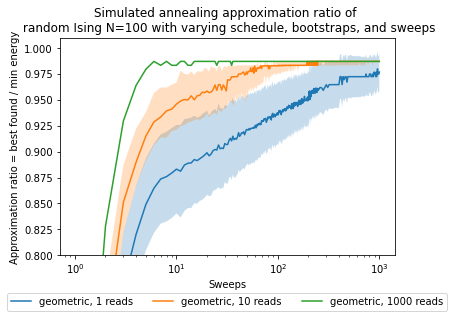

In [45]:
fig, ax = plt.subplots()
for boot in boots:
    for schedule in schedules:
        ax.plot(sweeps,results['best'][boot][schedule], label=str(schedule) + ', ' + str(boot) + ' reads')
        if boot == total_reads:
            pass
        else:
            bestnp = np.stack(results['bestci'][boot][schedule], axis=0).T
            ax.fill_between(sweeps,bestnp[0],bestnp[1],alpha=0.25)
ax.set(xlabel='Sweeps')
ax.set(ylabel='Approximation ratio = best found / min energy')
ax.set_title('Simulated annealing approximation ratio of \n' +
          ' random Ising N=100 with varying schedule, bootstraps, and sweeps')
plt.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.15))
ax.set(xscale='log')
ax.set(ylim=[0.8,1.01])
# ax.set(xlim=[1,200])

[(0.8, 1.01)]

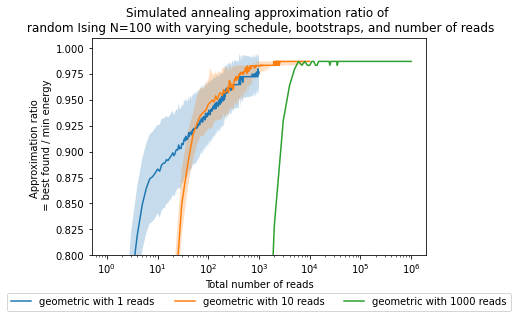

In [25]:
fig, ax = plt.subplots()
for boot in boots:
    reads = [s * boot for s in sweeps]
    for schedule in schedules:
        ax.plot(reads,results['best'][boot][schedule], label=str(schedule) + ' with ' + str(boot) + ' reads')
        if boot == total_reads:
            pass
        else:
            bestnp = np.stack(results['bestci'][boot][schedule], axis=0).T
            ax.fill_between(reads,bestnp[0],bestnp[1],alpha=0.25)
ax.set(xlabel='Total number of reads')
ax.set(ylabel='Approximation ratio \n = best found / min energy')
ax.set_title('Simulated annealing approximation ratio of \n' +
          ' random Ising N=100 with varying schedule, bootstraps, and number of reads')
plt.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.15))
ax.set(xscale='log')
ax.set(ylim=[0.8,1.01])
# ax.set(xlim=[1,200])

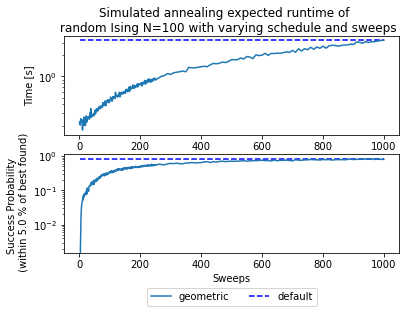

In [26]:
fig, (ax1,ax2) = plt.subplots(2)
fig.suptitle('Simulated annealing expected runtime of \n' +
             ' random Ising N=100 with varying schedule and sweeps')

for schedule in schedules:
    ax1.semilogy(sweeps, results['t'][schedule], '-', label=schedule)
ax1.hlines(results['t']['geometric'][-1], sweeps[0], sweeps[-1],
           linestyle='--', label='default', colors='b')

ax1.set(ylabel='Time [s]')
# ax1.set(xlim=[1,200])


for schedule in schedules:
    ax2.semilogy(sweeps, results['p'][total_reads][schedule], '-', label=schedule)
ax2.hlines(results['p'][total_reads]['geometric'][-1], sweeps[0], sweeps[-1],
           linestyle='--', label='default', colors='b')
# ax2.set(xlim=[1,200])

ax2.set(ylabel='Success Probability \n (within '+ str(treshold) +' % of best found)')
ax2.set(xlabel='Sweeps')
plt.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.3))

# Add plot going all the way to 1000 sweeps


minimum TTS for geometric schedule = 4.220738263417804s at sweep = 128


[Text(0.5, 0, 'Sweeps')]

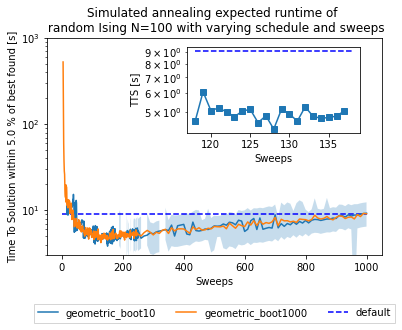

In [27]:
fig1, ax1 = plt.subplots()

for boot in boots:
    for schedule in schedules:
        if boot == 1:
            pass
        else:
            ax1.plot(sweeps,results['tts'][boot][schedule], label=schedule + "_boot" + str(boot))
            if boot == total_reads:
                pass
            else:
                ttsnp = np.stack(results['ttsci'][boot][schedule], axis=0).T
                ax1.fill_between(sweeps,ttsnp[0],ttsnp[1],alpha=0.25)


ax1.hlines(results['tts'][total_reads]['geometric'][-1], sweeps[0], sweeps[-1],
           linestyle='--', label='default', colors='b')

ax1.set(yscale='log')
ax1.set(ylim=[3,1e3])
# ax1.set(xlim=[1,200])

ax1.set(ylabel='Time To Solution within '+ str(treshold) +' % of best found [s]')
ax1.set(xlabel='Sweeps')
plt.title('Simulated annealing expected runtime of \n' +
          ' random Ising N=100 with varying schedule and sweeps')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=False, shadow=False)

ax2 = plt.axes([.45, .55, .4, .3])
for schedule in schedules:
    min_tts = min(results['tts'][total_reads][schedule])
    min_index = results['tts'][total_reads][schedule].index(min_tts)
    min_sweep = sweeps[results['tts'][total_reads][schedule].index(min_tts)]
    print("minimum TTS for " + schedule + " schedule = " + str(min_tts) + "s at sweep = " + str(min_sweep))
    ax2.semilogy(sweeps[min_index-10:min_index+10], results['tts'][total_reads][schedule][min_index-10:min_index+10], '-s')
ax2.hlines(results['tts'][total_reads]['geometric'][-1], sweeps[min_index-10], sweeps[min_index+10],
           linestyle='--', label='default', colors='b')

ax2.set(ylabel='TTS [s]')
ax2.set(xlabel='Sweeps')

In [33]:
results_name = "results_" + str(instance) + ".npy"
results_name = os.path.join(pickle_path, results_name)
with open(results_name, 'wb') as f:
    print(results_name)
    np.save(f, results, allow_pickle=True)
# with open('notebooks/results42.npy', 'rb') as f: np.load(f, allow_pickle=True)

/home/bernalde/repos/QuIPML/notebooks/results/results_42.npy


In [ ]:
overwrite_pickles = False
s = 0.99  # This is the success probability for the TTS calculation
treshold = 5.0  # This is a percentual treshold of what the minimum energy should be
# sweeps = list(chain(np.arange(1, 10, 1), np.arange(10, 30, 2), np.arange(
#     30, 50, 5), np.arange(50, 100, 10), np.arange(100, 1001, 100)))
# sweeps = list(chain(np.arange(1, 10, 1), np.arange(10, 30, 2), np.arange(
#     30, 50, 5), np.arange(50, 200, 10))) + [1000]
sweeps = list(chain(np.arange(1, 250, 1), np.arange(250, 1001, 10)))
# sweeps = list(chain(np.arange(1, 200, 1), np.arange(200, 1001, 100)))
# sweeps = list(chain(np.arange(1, 200, 1))) + [1000]
# schedules = ['geometric', 'linear']
schedules = ['geometric']
total_reads = 1000
# boots = [1, 10, 100, total_reads]
boots = [1, 10, total_reads]
all_results = {}

all_results_name = "all_results.pkl"
all_results_name = os.path.join(pickle_path, all_results_name)
# If you wanto to use the raw data and process it here
if use_raw_data:

    for instance in range(20):
        all_results[instance] = {}
        all_results[instance]['p'] = {}
        all_results[instance]['tts'] = {}
        all_results[instance]['ttsci'] = {}
        all_results[instance]['t']= {}
        all_results[instance]['best'] = {}
        all_results[instance]['bestci'] = {}

        np.random.seed(instance)  # Fixing the random seed to get the same result
        J = np.random.rand(N, N)
        # We only consider upper triangular matrix ignoring the diagonal
        J = np.triu(J, 1)
        h = np.random.rand(N)
        model_random = dimod.BinaryQuadraticModel.from_ising(h, J, offset=0.0)

        default_pickle_name = str(instance) + "_geometric_1000.p"
        default_pickle_name = os.path.join(pickle_path, default_pickle_name)
        if os.path.exists(default_pickle_name) and not overwrite_pickles:
            default_pickle_name = str(instance) + "_geometric_123.p"
            simAnnSamplesDefault = pickle.load(open(pickle_name, "rb"))
            timeDefault = simAnnSamplesDefault.info['timing']
        else:
            start = time.time()
            simAnnSamplesDefault = simAnnSampler.sample(model_random, num_reads=1000)
            timeDefault = time.time() - start
            simAnnSamplesDefault.info['timing'] = timeDefault
            pickle.dump(simAnnSamplesDefault, open(default_pickle_name, "wb"))
        energies = [datum.energy for datum in simAnnSamplesDefault.data(
            ['energy'], sorted_by='energy')]
        min_energy = energies[0]
        for schedule in schedules:

            all_results[instance]['t'][schedule] = {}
            all_results[instance]['p'][schedule] = {}
            all_results[instance]['tts'][schedule] = {}
            all_results[instance]['ttsci'][schedule] = {}
            all_results[instance]['best'][schedule] = {}
            all_results[instance]['bestci'][schedule] = {}

            # probs = []
            probs = {k: [] for k in boots}
            # time_to_sol = []
            # time_to_sol100 = []
            time_to_sol = {k: [] for k in boots}
            prob_np = {k: [] for k in boots}
            ttscs = {k: [] for k in boots}
            times = []
            b = {k: [] for k in boots}
            bnp = {k: [] for k in boots}
            bcs = {k: [] for k in boots}
            for sweep in sweeps:
                # Gather instance names
                pickle_name = str(instance) + "_" + schedule + "_" + str(sweep) + ".p"
                pickle_name = os.path.join(pickle_path, pickle_name)
                # If the instance data exists, load the data
                if os.path.exists(pickle_name) and not overwrite_pickles:
                    samples = pickle.load(open(pickle_name, "rb"))
                    time_s = samples.info['timing']
                # If it does not exist, generate the data
                else:
                    start = time.time()
                    samples = simAnnSampler.sample(
                        model_random, num_reads=1000, num_sweeps=sweep, beta_schedule_type=schedule)
                    time_s = time.time() - start
                    samples.info['timing'] = time_s
                    pickle.dump(samples, open(pickle_name, "wb"))
                # Compute statistics
                energies = samples.data_vectors['energy']
                occurrences = samples.data_vectors['num_occurrences']
                total_counts = sum(occurrences)
                times.append(time_s)
                if min(energies) < min_energy:
                    min_energy = min(energies)
                    # print("A better solution of " + str(min_energy) + " was found for sweep " + str(sweep))
                success = min_energy*(1.0 + treshold/100.0)**np.sign(min_energy)
                
                # Best of boot samples es computed via 1000 bootstrapping
                n_boot=1000
                ci=68
                boot_dist = {}
                pr_dist = {}
                cilo = {}
                ciup = {}
                pr_cilo = {}
                pr_ciup = {}
                for boot in boots:
                    # For all elements in bootstrapping, no bootstrapping required
                    if boot == total_reads:
                        # Best of all samples equivalent to minimum
                        b[boot].append(min(energies))
                        # No confidence intervals over the minimum
                        bcs[boot].append((0,0))
                        # Computing the success-rate of the whole sample
                        counts = {}
                        for index, energy in enumerate(energies):
                            if energy in counts.keys():
                                counts[energy] += occurrences[index]
                            else:
                                counts[energy] = occurrences[index]
                        pr = sum(counts[key] for key in counts.keys() if key < success)/total_counts
                        probs[boot].append(pr)
                        if pr == 0:
                            time_to_sol[boot].append(np.inf)
                        else:
                            time_to_sol[boot].append(time_s*math.log10(1-s)/math.log10(1-pr+1e-9))
                    
                    # For one element in bootstrapping, equivalent to median and std
                    elif boot == 1:
                        # Best of a single sample is equivalent to the median
                        b[boot].append(np.median(energies))
                        # Confidence interval for median (+- standard deviation)
                        bcs[boot].append((np.median(energies) - np.std(energies), np.median(energies) + np.std(energies)))
                    else:
                        boot_dist[boot] = []
                        pr_dist[boot] = []
                        for i in range(int(n_boot)):
                            resampler = np.random.randint(0, total_reads, boot)
                            sample_boot = energies.take(resampler, axis=0)
                            # Compute the best along that axis
                            boot_dist[boot].append(min(sample_boot))
            
                            occurences = occurrences.take(resampler, axis=0)
                            counts = {}
                            for index, energy in enumerate(sample_boot):
                                if energy in counts.keys():
                                    counts[energy] += occurences[index]
                                else:
                                    counts[energy] = occurences[index]
                            pr_dist[boot].append(sum(counts[key] for key in counts.keys() if key < success)/boot)
                        probs[boot] = np.median(pr_dist[boot])
                        if probs[boot] == 0:
                            time_to_sol[boot].append(np.inf)
                        else:
                            time_to_sol[boot].append(time_s*math.log10(1-s)/math.log10(1-probs[boot]+1e-9))      
                        
                        b[boot].append(np.median(boot_dist[boot]))
                        # Confidence intervals from bootstrapping the best out of boot
                        bnp[boot] = np.array(boot_dist[boot])
                        cilo[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, bnp[boot], 50.-ci/2.)
                        ciup[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, bnp[boot], 50.+ci/2.)  
                        bcs[boot].append((cilo[boot],ciup[boot]))
                        # Confidence intervals from bootstrapping the TTS of boot
                        prob_np[boot] = np.array(pr_dist[boot])
                        if prob_np[boot].all() == 0:
                            ttscs[boot].append((np.inf, np.inf))
                        else:
                            pr_cilo[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, prob_np[boot], 50.-ci/2.)
                            pr_ciup[boot] = np.apply_along_axis(stats.scoreatpercentile, 0, prob_np[boot], 50.+ci/2.)
                            ttscs[boot].append((time_s*math.log10(1-s)/math.log10(1-pr_cilo[boot]+1e-9),time_s*math.log10(1-s)/math.log10(1-pr_ciup[boot]+1e-9)))
                    

            all_results[instance]['t'][schedule][total_reads] = times
            for boot in boots:
                all_results[instance]['p'][schedule][boot] = probs[boot]
                all_results[instance]['tts'][schedule][boot] = time_to_sol[boot]
                all_results[instance]['ttsci'][schedule][boot] = ttscs[boot]
                all_results[instance]['best'][schedule][boot] = [energy / min_energy for energy in b[boot]]
                all_results[instance]['bestci'][schedule][boot] = [tuple(element / min_energy for element in energy) for energy in bcs[boot]]

    # Save results file in case that we are interested in reusing them
    pickle.dump(all_results, open(all_results_name, "wb"))
else: # Just reload processed datafile
    all_results = pickle.load(open(all_results_name, "rb"))

AttributeError: Can't get attribute 'CallableDict' on <module 'dimod.variables' from '/home/bernalde/miniconda3/envs/quipml/lib/python3.8/site-packages/dimod/variables.py'>

In [ ]:
def bootstrap(data, n_boot=1000, ci=68):
    boot_dist = []
    for i in range(int(n_boot)):
        resampler = np.random.randint(0, data.shape[0], data.shape[0])
        sample = data.take(resampler, axis=0)
        # Median ignoring nans instead of mean
        boot_dist.append(np.nanmedian(sample, axis=0))
    b = np.array(boot_dist)
    s1 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.-ci/2.)
    s2 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.+ci/2.)
    return (s1,s2)
    
def tsplotboot(ax, x, data, error_est, **kw):
    if x is None:
        x = np.arange(data.shape[1])
    # Median ignoring nans instead of mean
    est = np.nanmedian(data, axis=0)
    mask = ~np.isnan(est)
    if error_est == 'bootstrap':
        cis = bootstrap(data)
    elif error_est == 'std':
        sd = np.nanstd(data, axis=0)
        cis = (est - sd, est + sd)
    ax.fill_between(x[mask],cis[0][mask],cis[1][mask],alpha=0.35, **kw)
    ax.plot(x[mask],est[mask],**kw)
    ax.margins(x=0)

minimum median TTS for geometric schedule = 3.7653364116219237s at sweep = 214
minimum TTS for geometric schedule = 3.736748275061973s at sweep = 95


[Text(0.5, 0, 'Sweeps')]

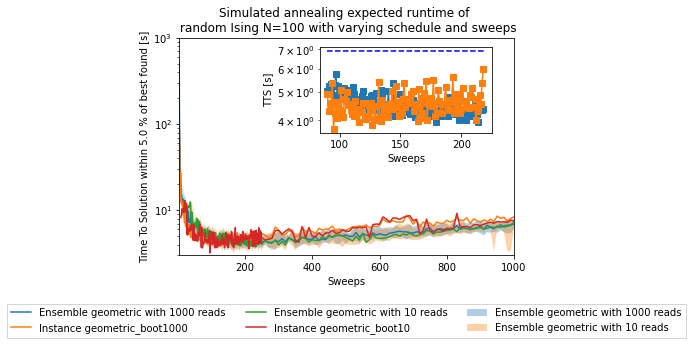

In [ ]:
fig, ax1 = plt.subplots()

for boot in reversed(boots):
    for schedule in schedules:
        if boot == 1:
            pass
        else:
            results_array = np.array([np.array(all_results[i]['tts'][schedule][boot]) for i in range(20)])
            min_median_tts = min(np.nanmedian(results_array, axis=0))
            tsplotboot(ax1, x=np.asarray(sweeps), data=results_array, error_est='bootstrap', label="Ensemble " + schedule + ' with ' + str(boot) + ' reads')

# for boot in reversed(boots):
#     for schedule in schedules:
#         if boot == 1:
#             pass
#         else:
            ax1.plot(sweeps,results['tts'][boot][schedule], label="Instance " + schedule + "_boot" + str(boot))


ax1.set(yscale='log')
ax1.set(ylim=[3,1e3])
# ax1.set(xlim=[1,200])

ax1.set(ylabel='Time To Solution within '+ str(treshold) +' % of best found [s]')
ax1.set(xlabel='Sweeps')
plt.title('Simulated annealing expected runtime of \n' +
          ' random Ising N=100 with varying schedule and sweeps')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=False, shadow=False)

ax2 = plt.axes([.45, .55, .4, .3])
for schedule in schedules:
    results_array = np.array([np.array(all_results[i]['tts'][schedule][total_reads]) for i in range(20)])
    min_median_index = np.argmin(np.nanmedian(results_array, axis=0))
    min_median_sweep = sweeps[min_median_index]
    min_tts = min(results['tts'][total_reads][schedule])
    min_index = results['tts'][total_reads][schedule].index(min_tts)
    min_sweep = sweeps[results['tts'][total_reads][schedule].index(min_tts)]
    if min_sweep < min_median_sweep:
        index_lo = min_index
        index_hi = min_median_index
    else:
        index_lo = min_median_index
        index_hi = min_index
    print("minimum median TTS for " + schedule + " schedule = " + str(min_median_tts) + "s at sweep = " + str(min_median_sweep))
    ax2.semilogy(sweeps[index_lo-5:index_hi+5],
        np.median([all_results[i]['tts'][schedule][total_reads] for i in range(20)],axis=0)
        [index_lo-5:index_hi+5], '-s')
    print("minimum TTS for " + schedule + " schedule = " + str(min_tts) + "s at sweep = " + str(min_sweep))
    ax2.semilogy(sweeps[index_lo-5:index_hi+5], 
        results['tts'][total_reads][schedule][index_lo-5:index_hi+5], '-s')
    
    
ax2.hlines(np.median([all_results[i]['tts'][schedule][total_reads][-1] for i in range(20)]),
        sweeps[index_lo-5], sweeps[index_hi+5],
           linestyle='--', label='default', colors='b')

ax2.set(ylabel='TTS [s]')
ax2.set(xlabel='Sweeps')

[None]

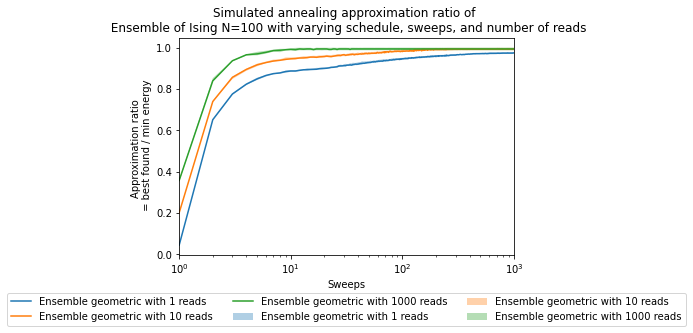

In [ ]:
ig, ax = plt.subplots()
for boot in boots:
    for schedule in schedules:
        best_array = np.array([np.array(all_results[i]['best'][schedule][boot]) for i in range(20)])
        # min_median_best = min(np.nanmedian(results_array, axis=0))
        tsplotboot(ax, x=np.asarray(sweeps), data=best_array, error_est='bootstrap', label="Ensemble " + schedule + ' with ' + str(boot) + ' reads')
ax.set(xlabel='Sweeps')
ax.set(ylabel='Approximation ratio \n = best found / min energy')
ax.set_title('Simulated annealing approximation ratio of \n' +
          ' Ensemble of Ising N=100 with varying schedule, sweeps, and number of reads')
plt.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.15))
ax.set(xscale='log')
# ax.set(ylim=[0.8,1.01])
# ax.set(xlim=[1,200])

[None]

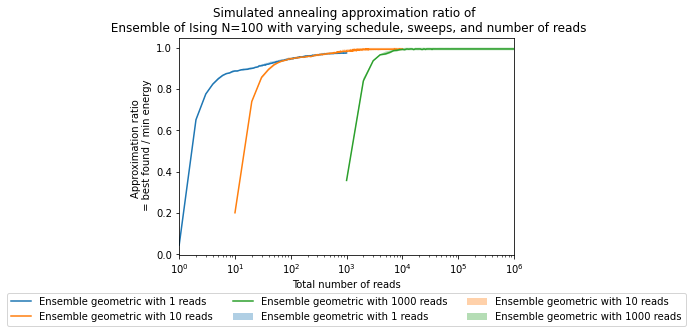

In [ ]:
fig, ax = plt.subplots()
for boot in boots:
    reads = [s * boot for s in sweeps]
    for schedule in schedules:
        best_array = np.array([np.array(all_results[i]['best'][schedule][boot]) for i in range(20)])
        # min_median_best = min(np.nanmedian(results_array, axis=0))
        tsplotboot(ax, x=np.asarray(reads), data=best_array, error_est='bootstrap', label="Ensemble " + schedule + ' with ' + str(boot) + ' reads')
ax.set(xlabel='Total number of reads')
ax.set(ylabel='Approximation ratio \n = best found / min energy')
ax.set_title('Simulated annealing approximation ratio of \n' +
          ' Ensemble of Ising N=100 with varying schedule, sweeps, and number of reads')
plt.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.15))
ax.set(xscale='log')
# ax.set(ylim=[0.8,1.01])
# ax.set(xlim=[1,200])

193
126
179
244
154
242
179
203
212
202
132
167
208
157
167
191
320
116
103
132


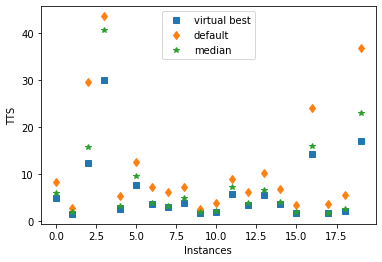

In [ ]:
indices = [np.argmin(all_results[i]['tts']['geometric'][total_reads]) for i in range(20)]
minima = [np.min(all_results[i]['tts']['geometric'][total_reads]) for i in range(20)]
default = [all_results[i]['tts']['geometric'][total_reads][-1] for i in range(20)]
for i in indices: print(sweeps[i])
median_all = [all_results[i]['tts']['geometric'][total_reads][min_median_index] for i in range(20)]
plt.plot(minima, 's', label='virtual best')
plt.plot(default, 'd', label='default')
plt.plot(median_all, '*', label='median')
plt.xlabel('Instances')
plt.ylabel('TTS')
plt.legend()

# for i in indices: print(sweeps[i])
# np.array([np.array(all_results[i]['best'][schedule][boot]) for i in range(20)])
# min_median_tts = min(np.nanmedian(results_array, axis=0))
# sweeps[np.argmin(np.nanmedian(results_array, axis=0))]

244
9.63419967593952
213


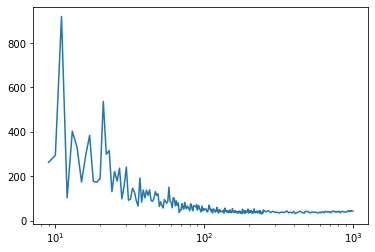

In [ ]:
plt.plot(sweeps,all_results[3]['tts']['geometric'][total_reads])
plt.xscale('log')
print(sweeps[np.argmin(all_results[3]['tts']['geometric'][total_reads])])
print(all_results[5]['tts']['geometric'][total_reads][min_median_index])
print(min_median_index)